Remember how for a single non-linear ODE, we were able to determine the steady state values and whether they were unstable or stable? Well, it's harder to do a similar analysis for systems of ODES.

We are going to limit ourselves to systems of two ODEs, and see what information we can extract without actually solving the system. Our system looks like the following homogeneous system:

$$\textbf{x}' = A \textbf{x} $$

In the 2D case:

$$x'_1 = ax_1 + bx_2 $$
$$x'_2 = cx_1 + dx_2 $$

We are going to plot the solutions in $x_1/x_2$ space by taking advantage of the fact that we can calculate the derivative of each. The vector of derivative values gives us a vector representation of the slope at each point. 

Let's try the system:

$$x'_1 = x_1 + 2x_2 $$
$$x'_2 = 3x_1 + 2x_2 $$

Represented as:

$$\textbf{x}' = \begin{pmatrix} 
1 & 2 \\
3 & 2 
\end{pmatrix} \textbf{x} $$

First, we find the eigenvalues via the equation:

$$(1 - \lambda)(2 - \lambda) - 6 = 0 $$
$$\lambda^2 - 3\lambda - 4 = 0 $$
$$(\lambda-4)(\lambda+1) $$

This gives the eigenvalues 4 and -1, with the corresponding eigenvectors $\begin{pmatrix} 
1 \\ -1 \end{pmatrix}$ and $\begin{pmatrix} 1 \\ \frac{3}{2} \end{pmatrix} $

The eigenvalues tell you something about the stablity of the system.

Positive eigenvalues will destabilize your system. We'll see that visually below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import odeint

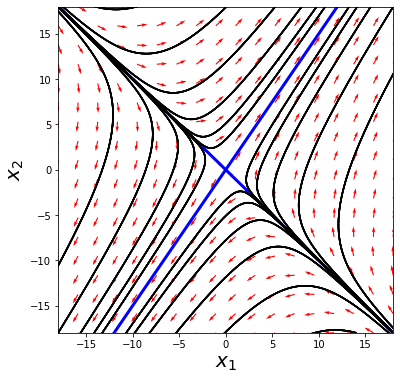

In [4]:
# Set a few parameters
span = 18 #Upper and lower limits on x1 and x2
spacing = 18 #Grid spacing at which to evaluate x1 and x2
t = np.linspace(0, 10, 502) #Time spacing (if needed)

def f(X, t):
    # A function to calculate the vector Ax or x'
    x1, x2 = X
    return [x1 + 2*x2, 3*x1 + 2*x2]

# Define x1 and x2
x1 = np.linspace(-span, span, spacing)
x2 = np.linspace(-span, span, spacing)
X1, X2 = np.meshgrid(x1, x2)

#Initialize u and v, which are x1' and x2'
u, v = np.zeros(X1.shape), np.zeros(X2.shape)
NI, NJ = X1.shape

# Calculate Ax at each value of x1 and x2
for i in range(NI):
    for j in range(NJ):
        x = X1[i, j]
        y = X2[i, j]
        xprime = f([x, y], t)
        ui = xprime[0]
        vi = xprime[1]
        
        #Normalization
        mag = np.sqrt(ui**2 + vi**2)
        u[i, j] = 5*xprime[0]/mag
        v[i, j] = 5*xprime[1]/mag

# Plot the phase portrait
fig, ax = plt.subplots(figsize=(6,6))
ax.quiver(X1, X2, u, v, color='r')
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_xlim([-span, span])
ax.set_ylim([-span, span])

xv1 = -x1
xv2 = 1.5*x2
ax.plot(x1, xv1, c='b', linewidth=3) #Add in eigenvector lines
ax.plot(x1, xv2, c='b', linewidth=3) #Add in eigenvector lines

# Add in solutions
array = [-15, -10, -5, 0, 5, 10, 15]
array1 = -18-np.logspace(-4, 0.6, 6)
array1 = np.append(array1, -18+np.logspace(-4, 0.6, 6))
array2 = np.ones(6)*18
#array1 = np.append(array1, array1)
for x1_0 in array1:
    for x2_0 in array2:
        x0 = [x1_0, x2_0]
        xs = odeint(f, x0, t)
        plt.plot(xs[:,0], xs[:,1], c='k')

# Add in solutions
array1 = 18-np.logspace(-4, 0.6, 6)
array1 = np.append(array1, 18+np.logspace(-4, 0.6, 6))
array2 = -np.ones(6)*18
for x1_0 in array1:
    for x2_0 in array2:
        x0 = [x1_0, x2_0]
        xs = odeint(f, x0, t)
        plt.plot(xs[:,0], xs[:,1], c='k')

Notice that all solutions other than the ones that fall directly on the lines $y=-x$ and $y=\frac{3}{2}x$ defined by the eigenvectors shoot off to infinity as time increases. The equilibrium solution at $(0,0)$ is unstable and is known as a saddle point.